#### Carregando as importações

In [2]:
import import_ipynb
from imports.imports_common import *
from imports.imports_common_models_DL import *
from imports.imports_common_metrics import *

Carregamos cada imagem em uma lista e salvamos o rótulo correspondente em outra lista

In [3]:
# Criação do gerador de dados com aumento (data augmentation) apenas para o conjunto de treinamento
train_datagen = ImageDataGenerator(
    rescale = RESCALE,
    validation_split = VAL_SPLIT,  # Define a porcentagem de validação
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [4]:
# Gerador de dados para o conjunto de treinamento
dataset_train = train_datagen.flow_from_directory(
    path,
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    color_mode = COLOR_MODE,
    class_mode = 'categorical',
    subset = 'training', # Define o subset como treinamento
    seed = SEED
)

Found 5121 images belonging to 4 classes.


In [5]:
# Gerador de dados para o conjunto de validação
dataset_validation = train_datagen.flow_from_directory(
    path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    color_mode=COLOR_MODE,
    class_mode='categorical',
    subset='validation',
    seed=SEED # Define o subset como validação
)

Found 1279 images belonging to 4 classes.


In [6]:
# Criação do gerador de dados para o conjunto de teste (sem aumento de dados)
test_datagen = ImageDataGenerator(
    rescale = RESCALE
)

In [7]:
dataset_test = test_datagen.flow_from_directory(
    path,
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    color_mode = COLOR_MODE,
    class_mode ='categorical',
    subset = None,
    shuffle = False, # Não embaralhar os dados de teste
    seed = SEED
)

Found 6400 images belonging to 4 classes.


In [8]:
# Cria modelo LeNet-5
model = Sequential([
    Conv2D(6, (5, 5), activation='relu', input_shape=(*IMAGE_SIZE, 1)),
    MaxPooling2D(2, 2),
    Conv2D(16, (5, 5), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(4, activation='softmax')
])

In [9]:
# Compila modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Treinar modelo
history = model.fit(
    dataset_train,
    validation_data=dataset_validation,
    epochs=EPOCHS,
    callbacks=[early_stop]
)

Epoch 1/30
161/161 [==============================] - 44s 267ms/step - loss: 0.9870 - accuracy: 0.5204 - val_loss: 1.1727 - val_accuracy: 0.4081
Epoch 2/30
161/161 [==============================] - 31s 194ms/step - loss: 0.8666 - accuracy: 0.5854 - val_loss: 1.4522 - val_accuracy: 0.2392
Epoch 3/30
161/161 [==============================] - 29s 181ms/step - loss: 0.8321 - accuracy: 0.6055 - val_loss: 1.3759 - val_accuracy: 0.3690
Epoch 4/30
161/161 [==============================] - 29s 180ms/step - loss: 0.7855 - accuracy: 0.6378 - val_loss: 1.4032 - val_accuracy: 0.3901
Epoch 5/30
161/161 [==============================] - 27s 168ms/step - loss: 0.7381 - accuracy: 0.6643 - val_loss: 1.3851 - val_accuracy: 0.4027
Epoch 6/30
161/161 [==============================] - 28s 174ms/step - loss: 0.6838 - accuracy: 0.7018 - val_loss: 1.6584 - val_accuracy: 0.3800


In [11]:
# Avaliar o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(dataset_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

200/200 [==============================] - 9s 43ms/step - loss: 0.9840 - accuracy: 0.5216
Test Loss: 0.9840365052223206
Test Accuracy: 0.5215625166893005


In [12]:
# Prever as classes do conjunto de teste
dataset_test.reset()
predictions = model.predict(dataset_test)
predicted_classes = np.argmax(predictions, axis=1)

# Obter as classes verdadeiras do conjunto de teste
true_classes = dataset_test.classes

# Obter os rótulos das classes
class_labels = list(dataset_test.class_indices.keys())

# Imprimir o relatório de classificação
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

200/200 [==============================] - 9s 47ms/step
Classification Report:
                    precision    recall  f1-score   support

     Mild_Demented       0.35      0.34      0.34       896
 Moderate_Demented       0.00      0.00      0.00        64
      Non_Demented       0.56      0.88      0.68      3200
Very_Mild_Demented       0.45      0.10      0.16      2240

          accuracy                           0.52      6400
         macro avg       0.34      0.33      0.30      6400
      weighted avg       0.49      0.52      0.45      6400



c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples

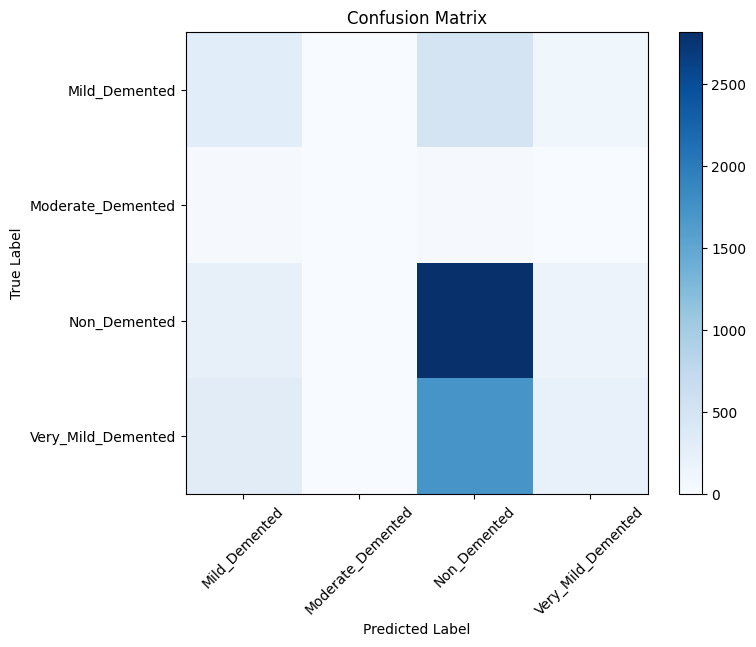

In [13]:
# Calcular e plotar a matriz de confusão
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()